In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
data = pd.read_csv(r'/Users/lawrencezhang/Desktop/LRFMC-航空公司/air_data.csv',encoding='utf-8')
data.head(10)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/02,2008/12/24,男,6,.,北京,CN,31.0,2014/03/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/02/19,2007/08/03,男,6,NaN,北京,CN,42.0,2014/03/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/02/01,2007/08/30,男,6,.,北京,CN,40.0,2014/03/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/08/22,2008/08/23,男,5,Los Angeles,CA,US,64.0,2014/03/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/04/10,2009/04/15,男,6,贵阳,贵州,CN,48.0,2014/03/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39
5,56972,2008/02/10,2009/09/29,男,6,广州,广东,CN,64.0,2014/03/31,...,2460,29783,29783,343121,152538,0.456522,0.543478,0.608233,0.391764,15
6,44924,2006/03/22,2006/03/29,男,6,乌鲁木齐市,新疆,CN,46.0,2014/03/31,...,12320,50009,50009,298873,175673,0.504950,0.495050,0.495048,0.504948,29
7,22631,2010/04/09,2010/04/09,女,6,温州市,浙江,CN,50.0,2014/03/31,...,9500,49334,49334,351198,193601,0.589041,0.410959,0.522078,0.477919,14
8,32197,2011/06/07,2011/07/01,男,5,DRANCY,NaN,FR,50.0,2014/03/31,...,500,32200,32200,295158,168028,0.410714,0.589286,0.483459,0.516537,7
9,31645,2010/07/05,2010/07/05,女,6,温州,浙江,CN,43.0,2014/03/31,...,0,47052,47052,251907,143958,0.390625,0.609375,0.526951,0.473044,16


    MEMBER_NO会员卡号
    FFP_DATE入会时间
    FIRST_FLIGHT_DATE第一次飞行日期
    GENDER性别
    FFP_TIER会员卡级别
    WORK_CITY工作地城市
    WORK_PROVINCE工作地所在省份
    WORK_COUNTRY工作地所在国家
    AGE年龄
    LOAD_TIME观测窗口的结束时间
    FLIGHT_COUNT飞行次数
    BP_SUM观测窗口总基本积分
    EP_SUM_YR_1第一年精英资格积分
    EP_SUM_YR_2第二年精英资格积分
    SUM_YR_1第一年总票价
    SUM_YR_2第二年总票价
    SEG_KM_SUM观测窗口总飞行公里数
    WEIGHTED_SEG_KM观测窗口总加权飞行公里数（Σ舱位折扣×航段距离）
    LAST_FLIGHT_DATE末次飞行日期
    AVG_FLIGHT_COUNT观测窗口季度平均飞行次数
    AVG_BP_SUM观测窗口季度平均基本积分累积
    BEGIN_TO_FIRST观察窗口内第一次乘机时间至MAX（观察窗口始端，入会时间）时长
    LAST_TO_END最后一次乘机时间至观察窗口末端时长
    AVG_INTERVAL平均乘机时间间隔
    MAX_INTERVAL观察窗口内最大乘机间隔
    ADD_POINTS_SUM_YR_1观测窗口中第1年其他积分（合作伙伴、促销、外航转入等）
    ADD_POINTS_SUM_YR_2观测窗口中第2年其他积分（合作伙伴、促销、外航转入等）
    EXCHANGE_COUNT积分兑换次数
    avg_discount平均折扣率
    P1Y_Flight_Count第1年乘机次数
    L1Y_Flight_Count第2年乘机次数
    P1Y_BP_SUM第1年里程积分
    L1Y_BP_SUM第2年里程积分
    EP_SUM观测窗口总精英积分
    ADD_Point_SUM观测窗口中其他积分（合作伙伴、促销、外航转入等）
    Eli_Add_Point_Sum非乘机积分总和
    L1Y_ELi_Add_Points第2年非乘机积分总和
    Points_Sum总累计积分
    L1Y_Points_Sum第2年观测窗口总累计积分
    Ration_L1Y_Flight_Count第2年的乘机次数比率
    Ration_P1Y_Flight_Count第1年的乘机次数比率
    Ration_P1Y_BPS第1年里程积分占最近两年积分比例
    Ration_L1Y_BPS第2年里程积分占最近两年积分比例
    Point_NotFlight非乘机的积分变动次数

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 44 columns):
MEMBER_NO                  62988 non-null int64
FFP_DATE                   62988 non-null object
FIRST_FLIGHT_DATE          62988 non-null object
GENDER                     62985 non-null object
FFP_TIER                   62988 non-null int64
WORK_CITY                  60719 non-null object
WORK_PROVINCE              59740 non-null object
WORK_COUNTRY               62962 non-null object
AGE                        62568 non-null float64
LOAD_TIME                  62988 non-null object
FLIGHT_COUNT               62988 non-null int64
BP_SUM                     62988 non-null int64
EP_SUM_YR_1                62988 non-null int64
EP_SUM_YR_2                62988 non-null int64
SUM_YR_1                   62437 non-null float64
SUM_YR_2                   62850 non-null float64
SEG_KM_SUM                 62988 non-null int64
WEIGHTED_SEG_KM            62988 non-null float64
LAST_FLIGHT_

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.00,15747.750000,31494.500000,47241.250000,62988.000000
FFP_TIER,62988.0,4.102162,0.373856,4.00,4.000000,4.000000,4.000000,6.000000
AGE,62568.0,42.476346,9.885915,6.00,35.000000,41.000000,48.000000,110.000000
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.00,3.000000,7.000000,15.000000,213.000000
BP_SUM,62988.0,10925.081254,16339.486151,0.00,2518.000000,5700.000000,12831.000000,505308.000000
EP_SUM_YR_1,62988.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
EP_SUM_YR_2,62988.0,265.689623,1645.702854,0.00,0.000000,0.000000,0.000000,74460.000000
SUM_YR_1,62437.0,5355.376064,8109.450147,0.00,1003.000000,2800.000000,6574.000000,239560.000000
SUM_YR_2,62850.0,5604.026014,8703.364247,0.00,780.000000,2773.000000,6845.750000,234188.000000
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.00,4747.000000,9994.000000,21271.250000,580717.000000


In [7]:
data.isnull().sum().sort_values(ascending=False)

WORK_PROVINCE              3248
WORK_CITY                  2269
SUM_YR_1                    551
AGE                         420
SUM_YR_2                    138
WORK_COUNTRY                 26
GENDER                        3
Point_NotFlight               0
EP_SUM_YR_2                   0
AVG_FLIGHT_COUNT              0
LAST_FLIGHT_DATE              0
WEIGHTED_SEG_KM               0
SEG_KM_SUM                    0
FLIGHT_COUNT                  0
EP_SUM_YR_1                   0
BP_SUM                        0
Ration_L1Y_BPS                0
LOAD_TIME                     0
FFP_TIER                      0
FIRST_FLIGHT_DATE             0
FFP_DATE                      0
AVG_BP_SUM                    0
BEGIN_TO_FIRST                0
LAST_TO_END                   0
EP_SUM                        0
Ration_P1Y_BPS                0
Ration_P1Y_Flight_Count       0
Ration_L1Y_Flight_Count       0
L1Y_Points_Sum                0
Points_Sum                    0
L1Y_ELi_Add_Points            0
Eli_Add_

In [8]:
data=data[data['SUM_YR_1'].notnull() & data['SUM_YR_2'].notnull()]
t1= data['SUM_YR_1'] !=0
t2= data['SUM_YR_2'] !=0
t3= data['avg_discount'] !=0
data=data[t1|t2|t3]
path =r'/Users/lawrencezhang/Desktop/LRFMC-航空公司/air_data_cleaned.csv'
data.to_csv(path,sep=',',encoding='utf-8_sig')

R是最近消费时间间隔（Recency），可以用LAST_TO_END（最后一次乘机时间至观察窗口末端时长

F是消费频率（Frequency），FLIGHT_COUNT(观测窗口内的飞行次数)

M是消费金额（Monetary），消费金额航空票价收到距离和舱位等级多种因素的影响，
舱位因素=舱位所对应的折扣系数AVG_DISCOUNT的平均值，距离因素=一定时间内累积的飞行里程SEG_KM_SUM航空公司的会员系统，用户的入会时间长短能在一定程度上影响客户价值，所以增加指标入会时间长度，即客户关系长度：会员入会时间距观测窗口结束的月数=观测窗口的结束时间-入会时间（单位：月），即LOAD_TIME-FFP_DATE。

这样，我们需要5个指标LRFMC：

L=LOAD_TIME-FFP_DATE(会员入会时间距观测窗口结束的月数=观测窗口的结束时间-入会时间（单位：月）) 

R=LAST_TO_END（客户最近一次乘坐公司距观测窗口结束的月数=最后一次。。。）

F=FLIGHT_COUNT(观测窗口内的飞行次数)

M=SEG_KM_SUM(观测窗口的总飞行里程)

C=AVG_DISCOUNT(平均折扣率)

In [9]:
df=data[["FFP_DATE","LOAD_TIME","LAST_TO_END","FLIGHT_COUNT","SEG_KM_SUM","avg_discount"]]
df.head()

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2006/11/02,2014/03/31,1,210,580717,0.961639
1,2007/02/19,2014/03/31,7,140,293678,1.252314
2,2007/02/01,2014/03/31,11,135,283712,1.254676
3,2008/08/22,2014/03/31,97,23,281336,1.090870
4,2009/04/10,2014/03/31,5,152,309928,0.970658


In [10]:
def STRCTURE_LRFMC(data_set):
    dt_FFP_DATE=pd.to_datetime(data_set["FFP_DATE"])
    dt_LOAD_TIME=pd.to_datetime(data_set["LOAD_TIME"])
    FFP_LOAD_DATE=dt_LOAD_TIME-dt_FFP_DATE
    df2=data_set.copy()
    df2["L"]=FFP_LOAD_DATE.map(lambda x:x/np.timedelta64(30*24*60,"m"))
    df2["R"]=data_set["LAST_TO_END"]
    df2["F"]=data_set["FLIGHT_COUNT"]
    df2["M"]=data_set["SEG_KM_SUM"]
    df2["C"]=data_set["avg_discount"]
    df3=df2[["L","R","F","M","C"]]
    return df3
df3=STRCTURE_LRFMC(df)
df3.head()

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,86.566667,7,140,293678,1.252314
2,87.166667,11,135,283712,1.254676
3,68.233333,97,23,281336,1.090870
4,60.533333,5,152,309928,0.970658


In [12]:
def zscore_data(data):
    data2=(data-data.mean(axis=0))/data.std(axis=0)
    data2.columns=['Z'+i for i in data.columns]
    return data2
df4=zscore_data(df3)
df4.head()

,ZL,ZR,ZF,ZM,ZC
0,1.437337,-0.947610,14.054556,26.798659,1.296475
1,1.308764,-0.914510,9.087224,13.146340,2.868685
2,1.329997,-0.892444,8.732414,12.672331,2.881455
3,0.660006,-0.418019,0.784683,12.559322,1.995459
4,0.387527,-0.925544,9.938766,13.919232,1.345256


In [21]:
k=5
# 调用k-means算法
model = KMeans(n_clusters=5,init='random',random_state=28,n_jobs=4)
# 输入聚类类别数目，n_jobs为并行数
#n_clusters就是K值，也是聚类值
#init初始化方法，可以是kmeans++，随机，或者自定义的ndarray
model.fit(df4)  # 训练

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=4, precompute_distances='auto', random_state=28,
       tol=0.0001, verbose=0)

In [27]:
r1 = pd.Series(model.labels_).value_counts()  # 统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_)  # 找出聚类中心

In [34]:
r=pd.concat([r2,r1],axis=1)
r.columns = list(df4.columns) + [u'类别数目']  # 重命名表头
r.to_excel('../LRFMC-航空公司/KMeansNum.xls')
r

,ZL,ZR,ZF,ZM,ZC,类别数目
0,-0.699567,-0.414003,-0.161025,-0.160808,-0.256000,24773
1,-0.314036,1.683256,-0.572875,-0.535827,-0.173351,12179
2,0.484868,-0.801675,2.487117,2.428455,0.310348,5343
3,0.051279,-0.003016,-0.227978,-0.232012,2.187512,4209
4,1.161917,-0.377088,-0.086262,-0.094252,-0.154787,15788


In [35]:
r3 = pd.concat([df4, pd.Series(model.labels_, index=df4.index)], axis=1)   # 详细输出每个样本对应的类别
r3.columns = list(df4.columns) + [u'聚类类别']  # 重命名表头
r3.to_excel('../LRFMC-航空公司/KMeans.xls')
r3

,ZL,ZR,ZF,ZM,ZC,聚类类别
0,1.437337,-0.947610,14.054556,26.798659,1.296475,2
1,1.308764,-0.914510,9.087224,13.146340,2.868685,2
2,1.329997,-0.892444,8.732414,12.672331,2.881455,2
3,0.660006,-0.418019,0.784683,12.559322,1.995459,2
4,0.387527,-0.925544,9.938766,13.919232,1.345256,2
...,...,...,...,...,...,...
62974,2.077838,-0.462151,-0.705517,-0.804245,-0.064595,4
62975,0.558563,-0.285621,-0.705517,-0.804245,-0.280948,4
62976,-0.147994,-0.737980,-0.705517,-0.771237,-2.687871,0
62977,-1.204881,1.606564,-0.705517,-0.778751,-2.552651,1


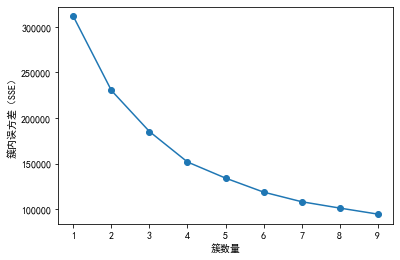

In [36]:
distortions=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,init='random',random_state=28)
    #n_clusters就是K值，也是聚类值
    #init初始化方法，可以是kmeans++，随机，或者自定义的ndarray
    km.fit(df4)
    distortions.append(km.inertia_)

plt.plot(range(1,10),distortions,marker="o")
plt.xlabel("簇数量")
plt.ylabel("簇内误方差（SSE）")
plt.show()

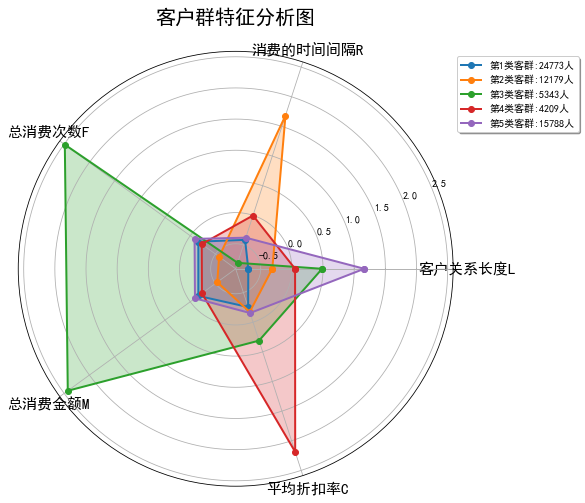

<Figure size 432x288 with 0 Axes>

In [42]:
max = r2.values.max()
min = r2.values.min()
# 绘图
fig=plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)
center_num = r.values
feature = ["客户关系长度L","消费的时间间隔R","总消费次数F","总消费金额M","平均折扣率C"]
N =len(feature)
for i, v in enumerate(center_num):
    # 设置雷达图的角度，用于平分切开一个圆面
    angles=np.linspace(0, 2*np.pi, N, endpoint=False)
    # 为了使雷达图一圈封闭起来，需要下面的步骤
    center = np.concatenate((v[:-1],[v[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    # 绘制折线图
    ax.plot(angles, center, 'o-', linewidth=2, label = "第%d类客群:%d人"% (i+1,v[-1]))
    # 填充颜色
    ax.fill(angles, center, alpha=0.25)
    # 添加每个特征的标签
    ax.set_thetagrids(angles * 180/np.pi, feature, fontsize=15)
    # 设置雷达图的范围
    ax.set_ylim(min-0.1, max+0.1)
    # 添加标题
    plt.title('客户群特征分析图', fontsize=20)
    # 添加网格线
    ax.grid(True)
    # 设置图例
    plt.legend(loc='upper right', bbox_to_anchor=(1.3,1.0),ncol=1,fancybox=True,shadow=True)

# 显示图形
plt.show()
plt.savefig("客户群特征分析图.jpg",dpi=200)

## 客户价值分析
    针对“客户群特征分析图”所示的聚类结果，结合业务进行特征分析。我们重点关注的是L（户关系长度）、F（消费频率）、M（飞行里程）三个指标：
    客户群1：在C属性上最大，可定义为重要挽留客户；
    客户群2：在R属性上最大，在F、M属性上最小，可定义为低价值客户；
    客户群3：在F、M属性上最大，在R属性上最小，可定义为重要保持客户；
    客户群4：在L、C属性上最小，可定义为一般客户；
    客户群5：在L属性上最大，可定义为重要发展客户；

## 客户群价值排名
    重要保持客户：C（平均折扣率较高、仓位等级较高）、F（乘坐次数）、M（里程）较高，R（最近乘坐航班）低。应将资源优先投放到这类客户身上，进行差异化管理，提高客户的忠诚度和满意度。
    重要发展客户：C较高，R、F、M较低。这类客户入会时长（L）短、当前价值低、发展潜力大，应促使客户增加在本公司和合作伙伴处的消费。
    重要挽留客户：C、F 或 M 较高，R较高 或 L变小，客户价值变化的不确定性高。应掌握客户最新信息、维持与客户的互动。
    一般和低价值客户：C、F、M、L低、R较高。这类客户可能在打折促销时才会选择消费。
    

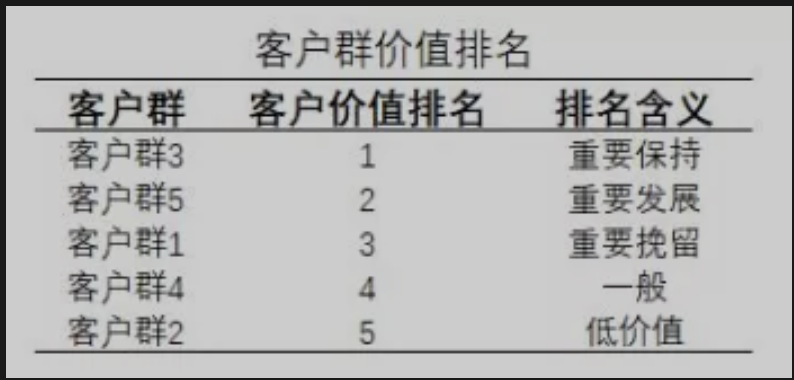